## Solve and explore [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equation) equations
The Lotka-Volterra or predator-prey equations can be used to model the dynamics of a biological system.
We solve and explore a simple model using
- [NumPy](http://numpy.org/) and 
- [SciPy](http://scipy.org/scipylib/index.html) and
- [ipywidgets](https://github.com/ipython/ipywidgets).


### Lotka what?

# [Lotka–Volterra equation](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

$$\begin{align} \frac{dx}{dt} = \alpha x - \beta x y \\ \frac{dy}{dt} = \delta x y - \gamma y \end{align} $$

where

- $x$ is the number of prey (for example, rabbits);
    
- $y$ is the number of some predator (for example, foxes);
    
- $\tfrac{dy}{dt}$ and $\tfrac{dx}{dt}$ represent the growth rates of the two populations over time;
    
- $t$ represents time; 
    
- and $α$, $β$, $γ$, $δ$ are positive real parameters describing the interaction of the two species.

### Preparation

In [1]:
%matplotlib inline
from collections import namedtuple
from ipywidgets import interactive
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns  # just for the styling

# some parameters we will need
x0 = 10  # initial number of prey (rabbits)
y0 = 10  # initial number of predators (foxes)
alpha = 1
beta = 0.1
delta = 0.075
gamma = 1.5
Coeffs = namedtuple('coeffs', ['alpha', 'beta', 'delta', 'gamma'])
coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

In [2]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

### Solution

In [3]:
def dX_dt(X, t, coeffs):  # this is the right hand side
    
    alpha, beta, delta, gamma = coeffs
    x, y = X
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    
    return np.array([dx_dt, dy_dt])

In [4]:
X0 = np.array([x0, y0])  # initial conditions
t = np.linspace(0, 15, 200)  # time (you always need time...)

X = odeint(dX_dt, X0, t, args=(coeffs,))  # that's it!
X

array([[ 10.        ,  10.        ],
       [ 10.02092528,   9.45073035],
       [ 10.08233081,   8.93371756],
       [ 10.18248651,   8.44885208],
       [ 10.32005366,   7.9956772 ],
       [ 10.4940383 ,   7.57347906],
       [ 10.70374942,   7.1813607 ],
       [ 10.94876147,   6.8183035 ],
       [ 11.22888062,   6.48321736],
       [ 11.54411406,   6.17498161],
       [ 11.89464176,   5.89247818],
       [ 12.28078965,   5.63461897],
       [ 12.70300372,   5.40036805],
       [ 13.16182408,   5.18876016],
       [ 13.65785829,   4.99891645],
       [ 14.19175305,   4.83005808],
       [ 14.76416315,   4.68151894],
       [ 15.37571706,   4.5527575 ],
       [ 16.02697767,   4.44336885],
       [ 16.71839715,   4.35309755],
       [ 17.45026441,   4.28185156],
       [ 18.22264362,   4.22971816],
       [ 19.03530199,   4.19698207],
       [ 19.88762493,   4.18414653],
       [ 20.77851626,   4.19195768],
       [ 21.70628162,   4.22143278],
       [ 22.66849197,   4.27389221],
 

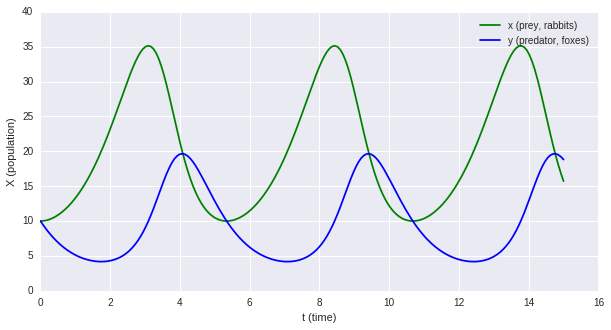

In [5]:
# often a picture is worth a thousand words
x, y = X.T
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, x, color='green', label='x (prey, rabbits)')
ax.plot(t, y, color='blue', label='y (predator, foxes)')
ax.set_xlabel('t (time)')
ax.set_ylabel('X (population)')
ax.legend()

### We can do better than that

In [6]:
# let's pretend we develop a GUI
# put the solve-plot-part in a function...
def solve_fox_rabbit(x0=10, y0=1/2, 
                     alpha=1, beta=0.1, delta=0.075, gamma=1.5):

    coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

    X0 = np.array([x0, y0])
    t = np.linspace(0, 15, 300)
    X = odeint(dX_dt, X0, t, args=(coeffs, ))
    x, y = X.T

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(t, x, color='green', label='x (prey, rabbits)')
    ax.plot(t, y, color='blue', label='y (predator, foxes)')
    ax.set_ylim([0, 50])
    ax.set_xlabel('t (time)')
    ax.set_ylabel('X (population)')
    ax.legend()


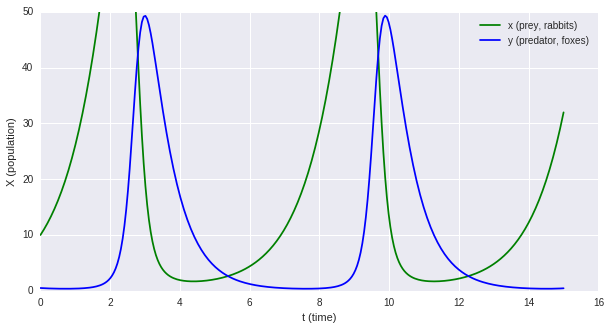

In [7]:
# ...to obtain an interactive plot
w = interactive(solve_fox_rabbit, 
                x0=(0.1, 20), y0=(0.1, 3), 
                alpha=(0., 5), beta=(0.01, 2), 
                delta=(0.01, 1), gamma=(0.1, 2))
display(w)
# wait second...

#### Final remarks
- See also the [Lotka-Volterra-Tutorial](https://scipy.github.io/old-wiki/pages/Cookbook/LoktaVolterraTutorial).